# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
This Friends TV show dataset contains the following:
- epseason
- epnum
- epname
- rating
- dynamics

The episode dynamics are codified by numbers. The six friends are defined as follows: Chandler=1 Joey=2 Monica=3 Phoebe=4 Rachel=5 Ross=6. So, 236 is a plotline made up of Joey, Monica, and Ross while 56 is a Rachel-Ross plotline.

Episode ratings are taken from IMDB: https://www.imdb.com/title/tt0108778/episodes

This dataset builds on the original dataset created by Alex Albright: https://raw.githubusercontent.com/apalbright/Friends/master/raw_data/friendsdata.csv



In [97]:
# load data
csv_path = 'data.csv'
df = pd.read_csv(csv_path)

In [19]:
df.head()

,epseason,epnum,epname,rating,dynamics
0,1,1,The One Where Monica Gets a Roommate,8.4,3
1,1,1,The One Where Monica Gets a Roommate,8.4,5
2,1,1,The One Where Monica Gets a Roommate,8.4,56
3,1,1,The One Where Monica Gets a Roommate,8.4,126
4,1,2,The One with the Sonogram at the End,8.1,3


# Analysis

There were 696 total plotlines in the 10 seasons/236 episodes of Friends

In [33]:
# 696 plotlines
print('Plotlines')
print(df.shape[0])

# 10 seasons
print('Seasons')
print(df['epseason'].nunique())

# 236 episodes
print('Episodes')
print(df['epname'].nunique())

Plotlines
696
Seasons
10
Episodes
236


## Individual Storylines

In [34]:
# define names 
names = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']


# define characters
chandler = 1
joey = 2
monica = 3
phoebe = 4
rachel = 5
ross = 6

In [38]:
# count individual storylines

# create a list of codes for individuals
individual_plotline_codes = [chandler, joey, monica, phoebe, rachel, ross]


def find_ind_freq(l):
    """function to create a dict of individual storyline frequencies"""
    
    # empty list
    ind_freq = []
    
    for i in l:
        ind_freq.append(df[df['dynamics'] == i].count()[0])
    
    ind_freq_dict = dict(zip(names, ind_freq))
  
    return names, ind_freq, ind_freq_dict

# find the individual frequencies
names, ind_freq, ind_freq_dict =  find_ind_freq(individual_plotline_codes)
print(ind_freq_dict)

{'Chandler': 34, 'Joey': 54, 'Monica': 42, 'Phoebe': 65, 'Rachel': 47, 'Ross': 56}


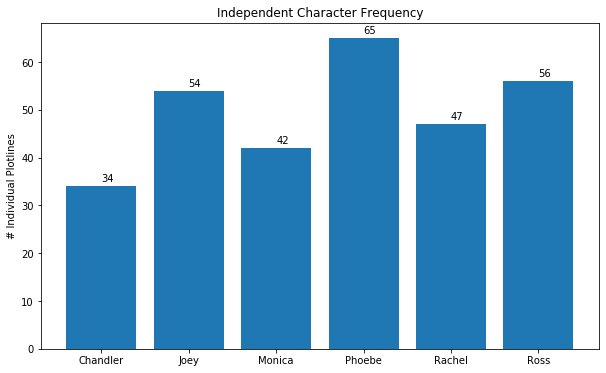

In [39]:
# plot the individual frequencies

# data 
labels = names
y_pos = np.arange(len(labels))
frequency = find_ind_freq(individual_plotline_codes)[1]

# plot and size
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(y_pos, frequency, align='center', alpha=1)

# ticks and labels
plt.xticks(y_pos, labels)
plt.ylabel('# Individual Plotlines')
plt.title('Independent Character Frequency')
for index,data in enumerate(frequency):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.show()

## Pair Storylines

In [43]:
# define all 2 person dynamics
pair_codes = [12,13,14,15,16,23,24,25,26,34,35,36,45,46,56]
pair_names = ['chandler_joey', 'chandler_monica', 'chandler_phoebe','chandler_rachel', 'chandler_ross'
                           , 'joey_monica', 'joey_phoebe', 'joey_rachel', 'joey_ross'
                           , 'monica_phoebe', 'monica_rachel', 'monica_ross'
                           , 'phoebe_rachel', 'phoebe_ross'
                           , 'rachel_ross']


def find_twop_freq(l):
    """function to find pair frequencies"""
    
    #empty list
    twop_freq = []
    
    # iterate through list and get pair frequencies
    for i in l:
        twop_freq.append(df[df['dynamics'] == i].count()[0])
    
    # zip into dict with names
    twop_freq_dict = dict(zip(pair_names, twop_freq))
    
    return pair_names, twop_freq, twop_freq_dict


# find pair frequencies
pair, two_person_freq, twop_freq_dict =  find_twop_freq(pair_codes)
print(twop_freq_dict)
two_person_freq

{'chandler_joey': 36, 'chandler_monica': 63, 'chandler_phoebe': 6, 'chandler_rachel': 7, 'chandler_ross': 12, 'joey_monica': 7, 'joey_phoebe': 20, 'joey_rachel': 26, 'joey_ross': 14, 'monica_phoebe': 18, 'monica_rachel': 12, 'monica_ross': 4, 'phoebe_rachel': 17, 'phoebe_ross': 14, 'rachel_ross': 70}


[36, 63, 6, 7, 12, 7, 20, 26, 14, 18, 12, 4, 17, 14, 70]

In [44]:
# put the pairs/frequencies in a dataframe to sort

pair_df  = pd.DataFrame(twop_freq_dict,index=twop_freq_dict.keys())
pair_df = pair_df.iloc[0:1]
pair_df = pair_df.T
pair_df = pair_df.reset_index()
pair_df.columns = [ 'pair','freq']
pair_df = pair_df.sort_values('freq', ascending = False)
pair_df

,pair,freq
14,rachel_ross,70
1,chandler_monica,63
0,chandler_joey,36
7,joey_rachel,26
6,joey_phoebe,20
9,monica_phoebe,18
12,phoebe_rachel,17
8,joey_ross,14
13,phoebe_ross,14
4,chandler_ross,12


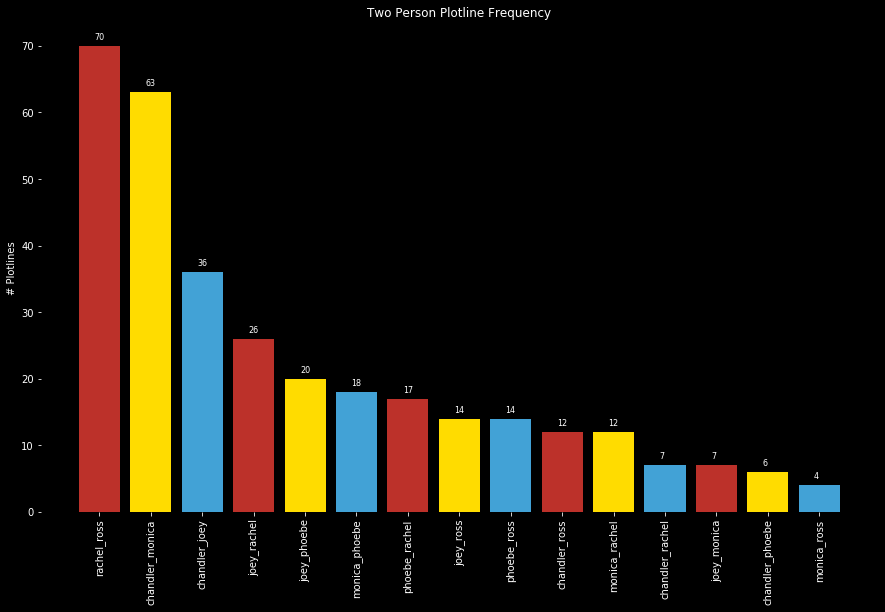

In [45]:
# data
labels = pair_df.pair
y_pos = np.arange(len(labels))
frequency = pair_df.freq

# define colors
colors = ['#BC312A', '#FFDC00' , '#42A2D6', '#BC312A', '#FFDC00' , '#42A2D6'
          , '#BC312A', '#FFDC00' , '#42A2D6', '#BC312A', '#FFDC00' , '#42A2D6'
          ,'#BC312A', '#FFDC00' , '#42A2D6']

# figure, size, and style
fig, ax = plt.subplots(figsize=(15,9))
plt.style.use('dark_background')
plt.grid(False)
plt.box(False)
plt.bar(y_pos, frequency, align='center', alpha=1, color = colors)

# ticks and labels
plt.xticks(y_pos, labels, rotation = 90)
plt.ylabel('# Plotlines')
plt.title('Two Person Plotline Frequency')
for index,data in enumerate(frequency):
    plt.text(x=index-0.1 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8))

# save file
#plt.savefig('2pfreq.png')

In [51]:
# didn't use this part in the project
# find the average rating of each pair 

# define all 2 person dynamics
pair_codes = [12,13,14,15,16,23,24,25,26,34,35,36,45,46,56]
pair_names = ['chandler_joey', 'chandler_monica', 'chandler_phoebe','chandler_rachel', 'chandler_ross'
                           , 'joey_monica', 'joey_phoebe', 'joey_rachel', 'joey_ross'
                           , 'monica_phoebe', 'monica_rachel', 'monica_ross'
                           , 'phoebe_rachel', 'phoebe_ross'
                           , 'rachel_ross']


def find_pair_rating(l):
    """function to find avg rating of each pair"""
    
    # empty list
    ratings = []
    
    # iterate through list and get mean rating for each pair
    for i in l:
        ratings.append(df[df['dynamics'] == i].rating.mean())
    
    # zip into dict with pair names
    pair_ratings_dict = dict(zip(pair_names, ratings))
    
    return pair_names, ratings, pair_ratings_dict

print(find_pair_rating(pair_codes)[2])

{'chandler_joey': 8.591666666666665, 'chandler_monica': 8.622222222222224, 'chandler_phoebe': 8.583333333333334, 'chandler_rachel': 8.742857142857142, 'chandler_ross': 8.441666666666666, 'joey_monica': 8.514285714285716, 'joey_phoebe': 8.5, 'joey_rachel': 8.48076923076923, 'joey_ross': 8.521428571428572, 'monica_phoebe': 8.33888888888889, 'monica_rachel': 8.55, 'monica_ross': 8.5, 'phoebe_rachel': 8.57058823529412, 'phoebe_ross': 8.514285714285716, 'rachel_ross': 8.584285714285718}


In [52]:
# didn't use this part in the project 

# define pair rating dict
pair_rating_dict = find_pair_rating(pair_codes)[2]


# merge the pair rating into a new df pair_rating_df
pair_rating_df  = pd.DataFrame(pair_rating_dict,index=pair_rating_dict.keys())
pair_rating_df = pair_rating_df.iloc[0:1]
pair_rating_df = pair_rating_df.T
pair_rating_df = pair_rating_df.reset_index()
pair_rating_df.columns = [ 'pair','rating']
pair_rating_df = pair_rating_df.sort_values('rating', ascending = False)
pair_rating_df
rating_freq_df = pd.merge(pair_rating_df, pair_df)
rating_freq_df = rating_freq_df.sort_values('freq', ascending = False)
rating_freq_df

,pair,rating,freq
3,rachel_ross,8.584286,70
1,chandler_monica,8.622222,63
2,chandler_joey,8.591667,36
12,joey_rachel,8.480769,26
10,joey_phoebe,8.500000,20
14,monica_phoebe,8.338889,18
5,phoebe_rachel,8.570588,17
7,joey_ross,8.521429,14
9,phoebe_ross,8.514286,14
6,monica_rachel,8.550000,12


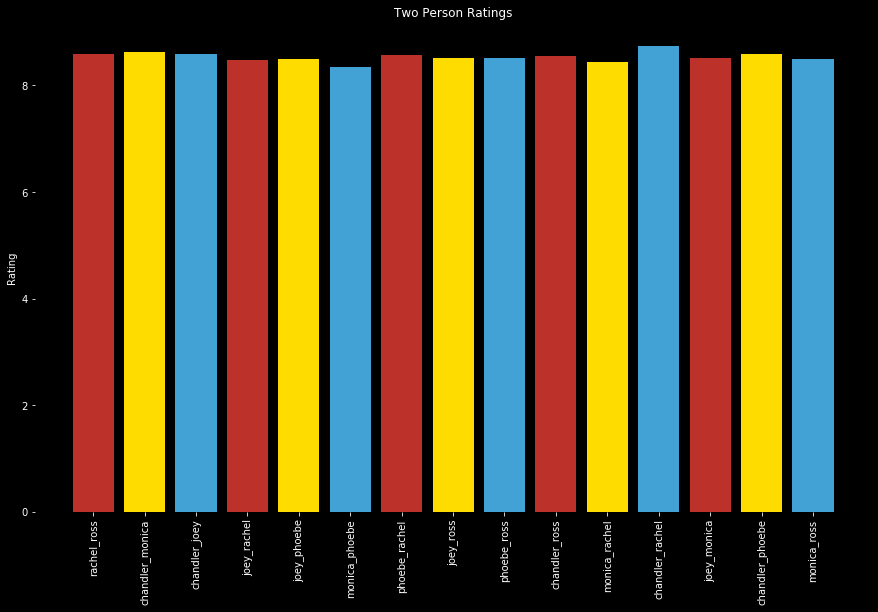

In [54]:
# didn't use this part in the project 

# define sorted name variable
pair_names_sorted = pair_df.pair.to_list()

# data
labels = pair_names_sorted
y_pos = np.arange(len(labels))
pair_rating = rating_freq_df.rating

# colors
colors = ['#BC312A', '#FFDC00' , '#42A2D6', '#BC312A', '#FFDC00' , '#42A2D6'
          , '#BC312A', '#FFDC00' , '#42A2D6', '#BC312A', '#FFDC00' , '#42A2D6'
          ,'#BC312A', '#FFDC00' , '#42A2D6']

# plot, size, style
fig, ax = plt.subplots(figsize=(15,9))
plt.style.use('dark_background')
plt.bar(y_pos, pair_rating, align='center', alpha=1, color = colors)
plt.grid(False)
plt.box(False)


# ticks and labels
plt.xticks(y_pos, labels, rotation = 90)
plt.ylabel('Rating')
plt.title('Two Person Ratings');

## Favorite Episodes

In [56]:
# find the top 5 episodes

sorted_ratings = df[['epseason','epnum','epname','rating']]
sorted_ratings = sorted_ratings.sort_values(['rating', 'epseason','epnum'], ascending = False)
sorted_ratings = sorted_ratings.drop_duplicates(subset=['epseason', 'epnum'], keep='first')

top_five = [i for i in sorted_ratings.epname][0:5]
print('The top 5 episodes are:',top_five)

The top 5 episodes are: ['The Last One: Part 2', 'The One Where Everybody Finds Out', 'The Last One: Part 1', 'The One with the Embryos', 'The One with the Prom Video']


In [57]:
sorted_ratings.head(20)

,epseason,epnum,epname,rating
692,10,18,The Last One: Part 2,9.7
322,5,14,The One Where Everybody Finds Out,9.7
688,10,17,The Last One: Part 1,9.5
251,4,12,The One with the Embryos,9.4
116,2,14,The One with the Prom Video,9.4
520,8,9,The One with the Rumor,9.3
506,8,4,The One with the Videotape,9.3
430,6,25,The One with the Proposal: Part 2,9.3
380,6,9,The One Where Ross Got High,9.2
305,5,8,The One with the Thanksgivings,9.2


## All Episode Ratings 

In [60]:
# create new df to drop duplicates on episodes to just get ratings
df2 = df[['epseason','epnum','rating']]
ep_ratings = df2.drop_duplicates(subset=['epseason', 'epnum'], keep='first')

ep_ratings.head()

,epseason,epnum,rating
0,1,1,8.4
4,1,2,8.1
7,1,3,8.2
10,1,4,8.2
13,1,5,8.5


In [61]:
# create a pt of the ratings
pt = pd.pivot_table(df2, values = 'rating', index=['epnum'], columns = 'epseason')
pt

epseason,1,2,3,4,5,6,7,8,9,10
epnum,,,,,,,,,,
1,8.4,8.5,8.5,9.1,8.9,8.8,8.4,8.7,8.6,8.5
2,8.1,8.3,9.0,8.1,9.0,8.3,8.4,9.1,8.6,8.8
3,8.2,8.4,8.1,8.5,8.8,8.3,8.2,8.7,8.3,8.8
4,8.2,8.0,8.1,8.3,8.3,8.6,8.2,9.3,8.2,8.4
5,8.5,8.3,8.2,8.4,8.8,8.2,8.2,8.2,8.5,8.3
6,8.2,8.6,9.1,8.6,8.1,8.6,8.9,8.6,8.4,8.2
7,9.0,9.0,8.4,8.8,8.4,8.4,8.5,8.0,8.7,8.3
8,8.2,8.5,8.4,9.1,9.2,8.6,8.2,8.8,8.8,8.9
9,8.3,8.0,9.0,8.0,9.1,9.2,8.2,9.3,8.2,8.6


In [62]:
# create a matrix of the pt and invert
ratings_matrix = pt.values
ratings_matrix[::-1]

array([[nan, nan, 8.9, nan, nan, 9.3, nan, nan, nan, nan],
       [8.9, 8.3, 8.2, 9.2, 9.1, 8.8, 9.1, 8.9, 8.7, nan],
       [8.7, 8.2, 8.1, 8.8, 8.8, 8.6, 8.9, 8.8, 8.5, nan],
       [8.4, 9. , 8.3, 8.6, 8.3, 9. , 8.5, 8.4, 7.9, nan],
       [8. , 8.2, 8.8, 7.3, 8.6, 8.6, 7.5, 8.2, 8.2, nan],
       [8. , 8.2, 8.2, 8.6, 8.4, 7.5, 8.5, 7.5, 8.3, nan],
       [8.2, 8.6, 8.2, 8.7, 8.8, 8.4, 8.7, 7.5, 8.2, nan],
       [8.9, 8.5, 8.5, 8.4, 8.1, 8.4, 8.5, 8.2, 8.6, 9.7],
       [8.5, 8.4, 8.3, 8.7, 8.5, 9.1, 8.4, 8.2, 8.5, 9.5],
       [8.2, 8.6, 9.1, 8.3, 8.6, 8.6, 8.7, 8.3, 8.3, 8.9],
       [8.3, 8.9, 8.6, 8.5, 8.6, 8.6, 8.5, 8.4, 8.4, 8.6],
       [8.3, 9.4, 7.9, 8.3, 9.7, 8.6, 8.6, 8.3, 8.3, 8.7],
       [8.7, 8.8, 8.3, 8.3, 8.2, 8.3, 8.5, 8.6, 8.2, 8.5],
       [8.3, 8.7, 8.3, 9.4, 8.3, 8.1, 8.7, 8.6, 8. , 8.9],
       [8.3, 8.2, 8.6, 8.5, 9.1, 8.2, 8.6, 8.1, 8.1, 9. ],
       [8.1, 8.1, 8.2, 8.1, 8.2, 8.6, 8.6, 8.1, 7.6, 8. ],
       [8.3, 8. , 9. , 8. , 9.1, 9.2, 8.2, 9.3, 8.2, 8.6

Text(0.5, 1, 'The one with all the ratings')

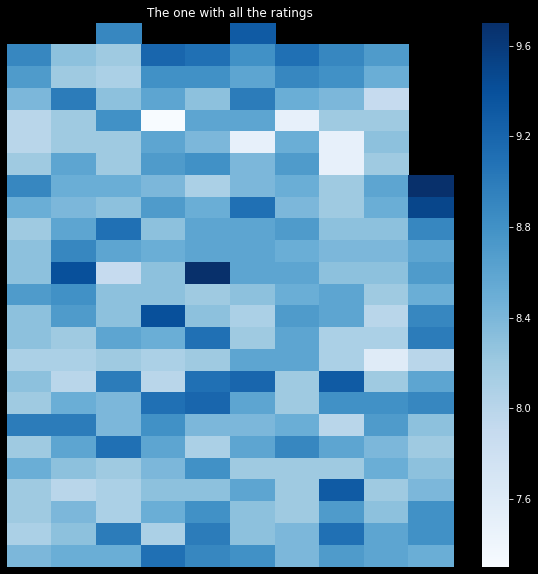

In [63]:
# create heatmap

# figure, size, style
fig = plt.figure(figsize=(10,10))
plt.style.use('dark_background')
r = sns.heatmap(ratings_matrix[::-1], cmap='Blues')
plt.xticks([]),plt.yticks([])

# choose font
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
r.set_title("The one with all the ratings")

# save file
# plt.savefig('The One With All The Ratings.png')

## Gender Dynamics

In [64]:
# define codes for women-only storylines
women_codes = [3,4,5,34,35,45,345]

# find number of plots and avg rating
women_df = df[df.dynamics.isin(women_codes)]
print('The mean rating for plots with women:',women_df.rating.mean())
print('There are', women_df.rating.count(), 'plots with women')


# define codes for men-only storylines
men_codes = [1,2,6,12,16,26,126]

# find number of plots and avg rating
men_df = df[df.dynamics.isin(men_codes)]
print('The mean rating for plots with men:',men_df.rating.mean())
print('There are', men_df.rating.count(), 'plots with men')

The mean rating for plots with women: 8.453521126760558
There are 213 plots with women
The mean rating for plots with men: 8.478037383177565
There are 214 plots with men


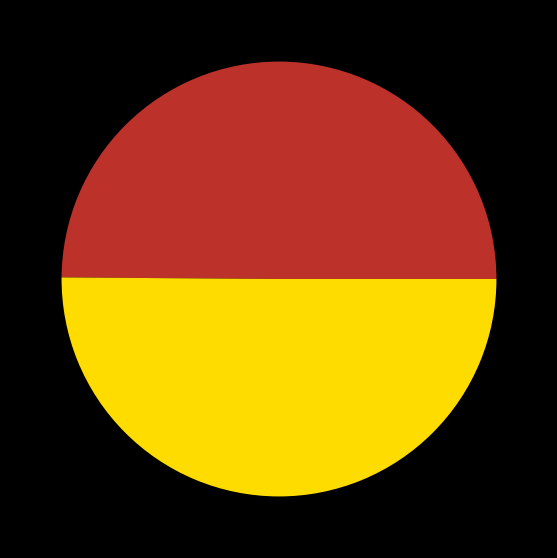

In [65]:
# make a pie chart of the number of storylines for men and women

plt.figure(figsize = (10,10))
plt.pie([women_df.rating.count(),men_df.rating.count()], colors = colors);

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


8.453521126760558
8.478037383177565


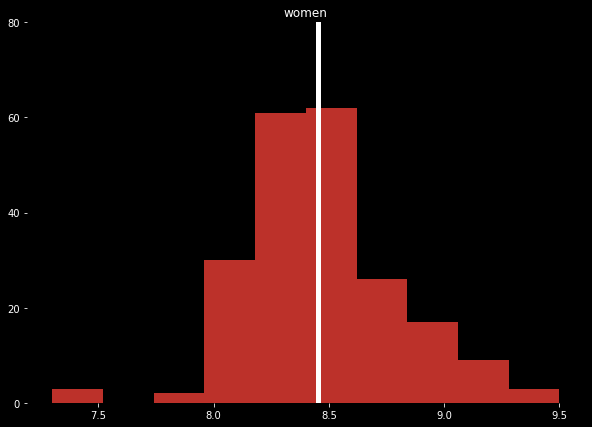

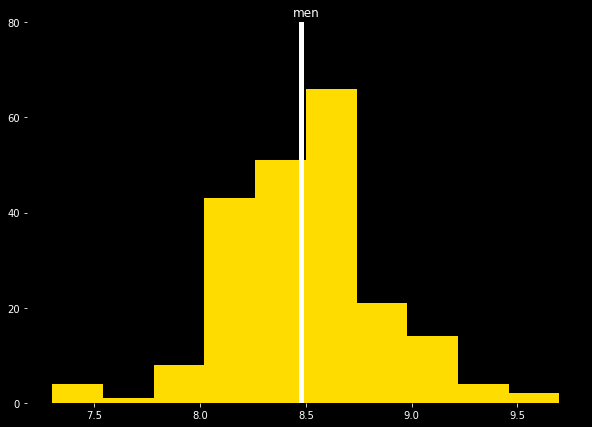

In [66]:
# histogram of women's ratings
women_df.hist('rating', color = '#BC312A', figsize =(10,7))
plt.axvline(women_df.rating.mean(), color = 'white', linewidth = 5)
plt.yticks([0,20,40,60, 80])
plt.grid(False)
plt.box(False)
plt.title('women')
print(women_df.rating.mean())


# histogram of men's ratings
men_df.hist('rating',  color = '#FFDC00', figsize =(10,7))
plt.axvline(men_df.rating.mean(), color = 'white', linewidth = 5)
plt.yticks([0,20,40,60, 80])
plt.grid(False)
plt.box(False)
plt.title('men')
print(men_df.rating.mean())

## Character Ratings (Individual and Pair)

### Chandler

In [67]:
#chandler stats

chandler_codes = [1,12,13,14,15,16,123,124,125,126,134,135,136,145,146,156]
chandler12_codes = [12,13,14,15,16]
chandler_df = df[df.dynamics.isin(chandler_codes)]
chandler_duo = df[df.dynamics.isin(chandler12_codes)]
chandler_only = df[df['dynamics'] == 1]


print('The mean rating for eps with plots around chandler:',chandler_duo.rating.mean())
print('The mean rating for eps with individual plots around chandler:',chandler_only.rating.mean())
print('Chandler appears in', chandler_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around chandler: 8.60080645161291
The mean rating for eps with individual plots around chandler: 8.326470588235294
Chandler appears in 124 plotlines


8.326470588235294


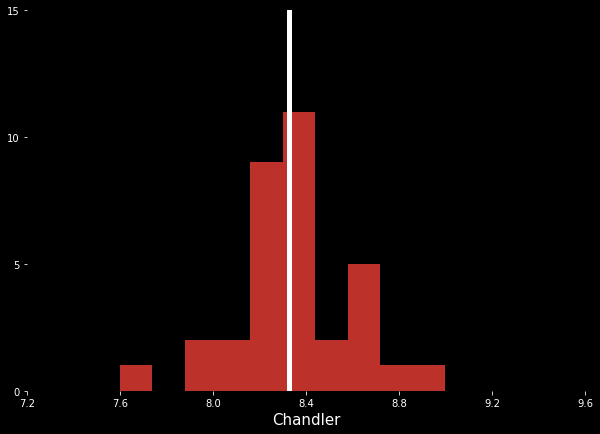

In [69]:
# chandler only histogram
chandler_only.hist('rating', color = '#BC312A', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(chandler_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('Chandler', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])

plt.title('')
print(chandler_only.rating.mean())

# save file
# plt.savefig('chandler ratings.png')

8.60080645161291


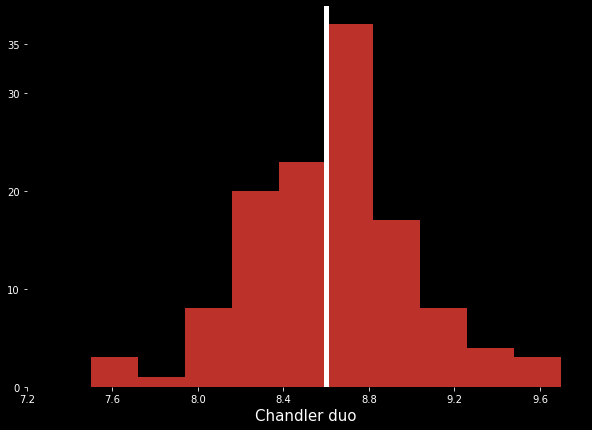

In [72]:
# chandler duo hist

chandler_duo.hist('rating', color = '#BC312A', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(chandler_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('Chandler duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35])

plt.title('')
print(chandler_duo.rating.mean())

# save file
# plt.savefig('chandler duo ratings.png')

### Joey

In [73]:
# joey stats

joey_codes = [2,12,23,24,25,26,123,124,125,126,234,235,236,245,246,256]
joey12_codes = [12,23,24,25,26]

joey_only = df[df['dynamics'] == 2]
joey_duo = df[df.dynamics.isin(joey12_codes)]
joey_df = df[df.dynamics.isin(joey_codes)]

print('The mean rating for eps with plots around joey:',joey_duo.rating.mean())
print('The mean rating for eps with individual plots around joey:',joey_only.rating.mean())
print('Joey appears in', joey_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around joey: 8.531067961165052
The mean rating for eps with individual plots around joey: 8.511111111111113
Joey appears in 103 plotlines


8.511111111111113


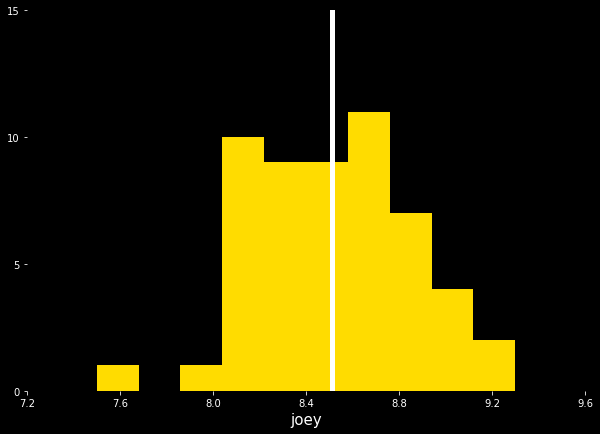

In [74]:
# joey only histogram

joey_only.hist('rating', color = '#FFDC00' , figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(joey_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('joey', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])

plt.title('')
print(joey_only.rating.mean())

# save file
# plt.savefig('joey ratings.png')

8.531067961165052


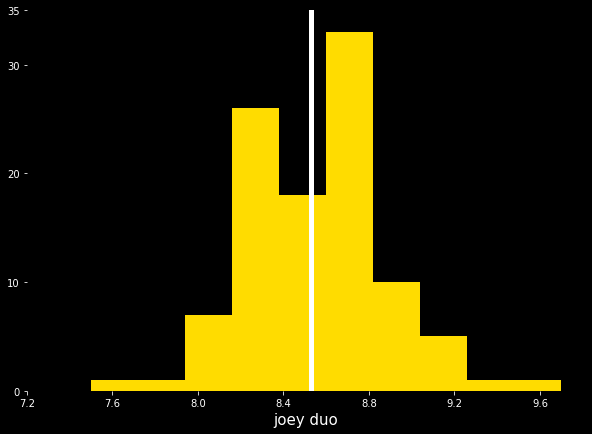

In [76]:
# joey duo histogram

joey_duo.hist('rating', color = '#FFDC00', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(joey_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('joey duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35])


plt.title('')
print(joey_duo.rating.mean())

# save file
# plt.savefig('joey duo ratings.png')

### Monica

In [77]:
# monica stats 
monica_codes = [3,13,23,34,35,36,123,134,135,136,234,235,236,345,346,356]
monica12_codes = [13,23,34,35,36]

monica_only = df[df['dynamics'] == 3]
monica_duo = df[df.dynamics.isin(monica12_codes)]
monica_df = df[df.dynamics.isin(monica_codes)]

print('The mean rating for eps with plots around monica:',monica_duo.rating.mean())
print('The mean rating for eps with individual plots around monica:',monica_only.rating.mean())
print('Monica appears in', monica_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around monica: 8.552884615384617
The mean rating for eps with individual plots around monica: 8.43809523809524
Monica appears in 104 plotlines


8.43809523809524


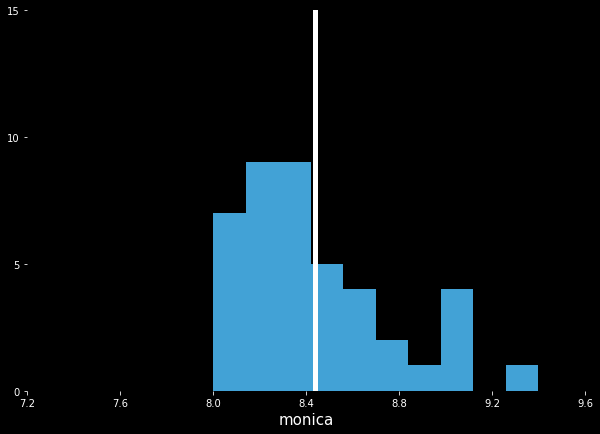

In [79]:
# monica only histogram

monica_only.hist('rating', color = '#42A2D6' , figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(monica_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('monica', fontsize = 15)

plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])

plt.title('')
print(monica_only.rating.mean())

# save file
#plt.savefig('monica ratings.png')

8.552884615384617


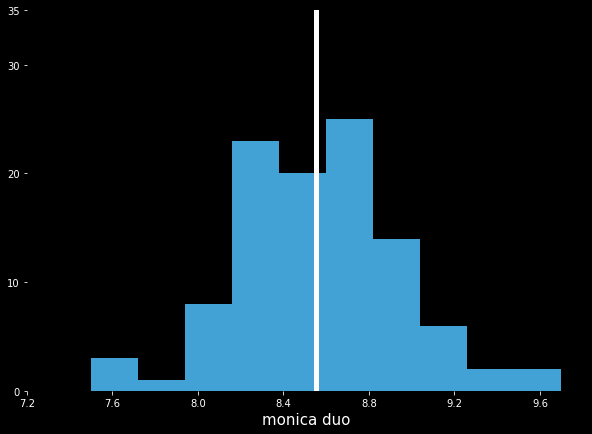

In [81]:
# monica duo histogram

monica_duo.hist('rating', color = '#42A2D6', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(monica_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('monica duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35])
plt.title('')

print(monica_duo.rating.mean())

# save file
# plt.savefig('monica duo ratings.png')

In [ ]:
### Phoebe

In [82]:
# phoebe stats

phoebe_codes = [4,14,24,34,45,46,124,134,145,146,234,245,246,345,346,456]
phoebe12_codes = [14,24,34,45,46]

phoebe_only = df[df['dynamics'] == 4]
phoebe_duo = df[df.dynamics.isin(phoebe12_codes)]
phoebe_df = df[df.dynamics.isin(phoebe_codes)]

print('The mean rating for eps with plots around phoebe:',phoebe_duo.rating.mean())
print('The mean rating for eps with individual plots around phoebe:',phoebe_only.rating.mean())
print('phoebe appears in', phoebe_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around phoebe: 8.486666666666665
The mean rating for eps with individual plots around phoebe: 8.483076923076922
phoebe appears in 75 plotlines


8.483076923076922


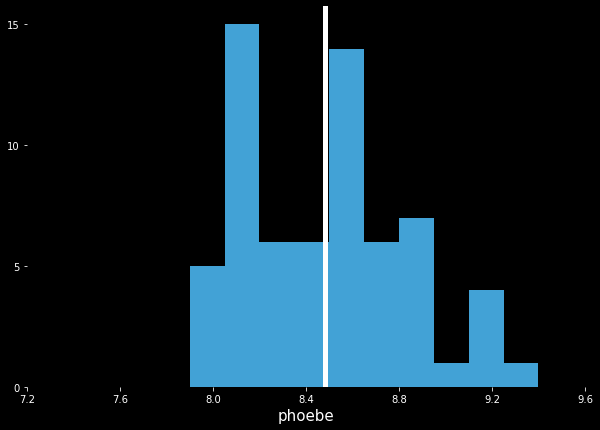

In [83]:
# phoebe only histogram

phoebe_only.hist('rating', color = '#42A2D6', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(phoebe_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('phoebe', fontsize = 15)
#plt.text(8.34,11.1,round(chandler_only.rating.mean(),2))
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])
plt.title('')

print(phoebe_only.rating.mean())

# save file
# plt.savefig('phoebe ratings.png')

8.486666666666665


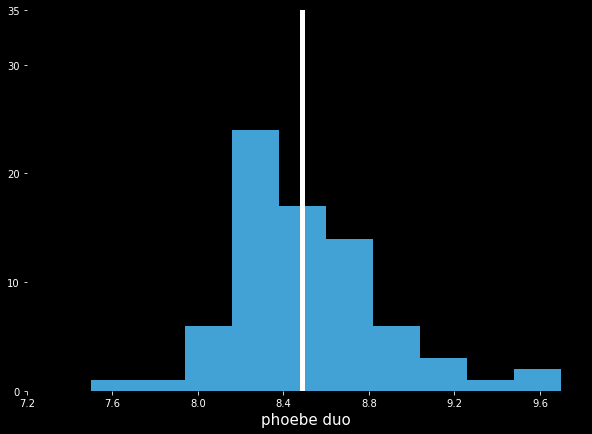

In [85]:
# phoebe duo histogram

phoebe_duo.hist('rating', color = '#42A2D6', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(phoebe_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('phoebe duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35])
plt.title('')

print(phoebe_duo.rating.mean())

# save file
# plt.savefig('phoebe duo ratings.png')

### Rachel

In [86]:
# rachel stats

rachel_codes = [5,15,25,35,45,56,125,135,145,156,235,245,256,345,356,456]
rachel12_codes = [15,25,35,45,56]

rachel_only = df[df['dynamics'] == 5]
rachel_duo = df[df.dynamics.isin(rachel12_codes)]
rachel_df = df[df.dynamics.isin(rachel_codes)]

print('The mean rating for eps with plots around rachel:',rachel_duo.rating.mean())
print('The mean rating for eps with individual plots around rachel:',rachel_only.rating.mean())
print('rachel appears in', rachel_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around rachel: 8.567424242424249
The mean rating for eps with individual plots around rachel: 8.389361702127662
rachel appears in 132 plotlines


8.389361702127662


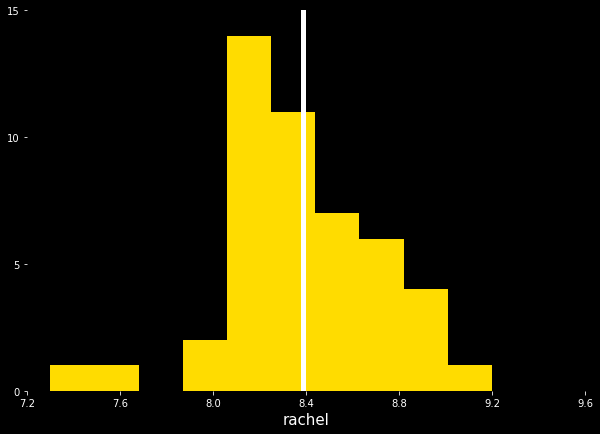

In [87]:
# rachel only histogram

rachel_only.hist('rating', color = '#FFDC00', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(rachel_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('rachel', fontsize = 15)
#plt.text(8.34,11.1,round(chandler_only.rating.mean(),2))
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])
plt.title('')

print(rachel_only.rating.mean())

# save file
# plt.savefig('rachel ratings.png')

8.567424242424249


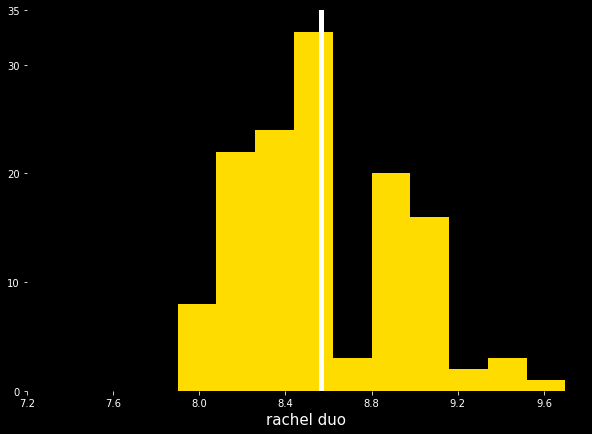

In [89]:
# rachel duo hist

rachel_duo.hist('rating', color = '#FFDC00', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(rachel_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('rachel duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35])
plt.title('')

print(rachel_duo.rating.mean())

# save file
# plt.savefig('rachel duo ratings.png')

### Ross

In [90]:
# ross stats

ross_codes = [6,16,26,36,46,56,126,136,146,156,236,246,256,346,356,456]
ross12_codes = [16,26,36,46,56]

ross_only = df[df['dynamics'] == 6]
ross_duo = df[df.dynamics.isin(ross12_codes)]
ross_df = df[df.dynamics.isin(ross_codes)]

print('The mean rating for eps with plots around ross:',ross_duo.rating.mean())
print('The mean rating for eps with individual plots around ross:',ross_only.rating.mean())
print('ross appears in', ross_duo.rating.count(), 'plotlines')

The mean rating for eps with plots around ross: 8.550000000000004
The mean rating for eps with individual plots around ross: 8.491071428571429
ross appears in 114 plotlines


8.491071428571429


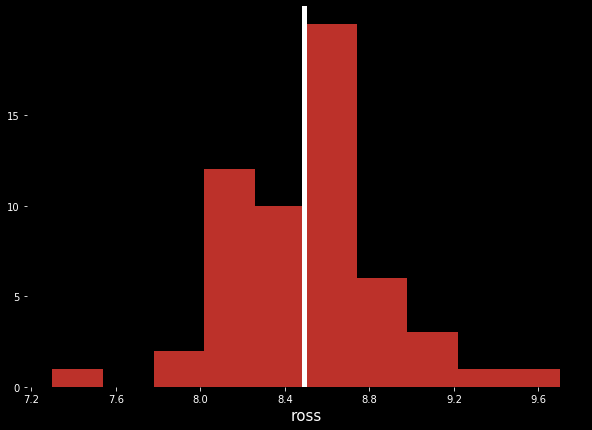

In [91]:
# ross only histogram

ross_only.hist('rating', color = '#BC312A', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(ross_only.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('ross', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,5,10,15])
plt.title('')

print(ross_only.rating.mean())

# save file
# plt.savefig('ross ratings.png')

8.550000000000004


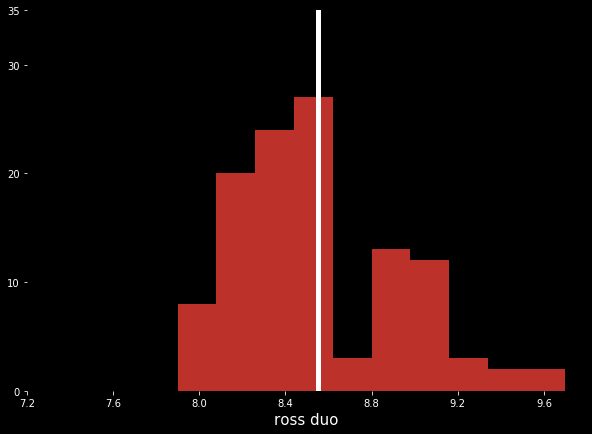

In [93]:
# ross duo histogram

ross_duo.hist('rating', color = '#BC312A', figsize =(10,7))

plt.style.use('dark_background')
plt.axvline(ross_duo.rating.mean(), color = 'white', linewidth = 5)
plt.xlabel('ross duo', fontsize = 15)
plt.grid(False)
plt.box(False)
plt.xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6])
plt.yticks([0,10,20,30,35,])
plt.title('')

print(ross_duo.rating.mean())

# save file
# plt.savefig('ross duo ratings.png')

## Character Rating Summary

In [95]:
# summarize stats for all the characters

individual_plotline_ratings = [8.326470588235294, 8.511111111111113, 8.43809523809524, 8.483076923076922, 8.389361702127662, 8.491071428571429]
pair_plotline_ratings = [8.60080645161291, 8.531067961165052, 8.552884615384617, 8.486666666666665, 8.567424242424249, 8.550000000000004]

ratings_list = [ [i,j] for i,j in zip(individual_plotline_ratings, pair_plotline_ratings) ]


character_ratings_dict = { i:j for i,j in zip(names,ratings_list) }
character_ratings_dict

#the highest rated individual plotline character was joey
#the lowest rated individual plotline character was chandler

#the highest rated character was chandler in plots with 2 characters 
#the lowest rated character was phoebe in plots with 2 characters 

{'Chandler': [8.326470588235294, 8.60080645161291],
 'Joey': [8.511111111111113, 8.531067961165052],
 'Monica': [8.43809523809524, 8.552884615384617],
 'Phoebe': [8.483076923076922, 8.486666666666665],
 'Rachel': [8.389361702127662, 8.567424242424249],
 'Ross': [8.491071428571429, 8.550000000000004]}

## Relationship Chord Visualizations
The chord diagram in this project was adopted from Nadieh Bremer's work. Check out http://bl.ocks.org/nbremer/94db779237655907b907 for details on how to create it.

In [96]:
# matrix for chord diagram
# this is javascript code and will not work here
# I'm only leaving this if you want to recreate my chord diagram

# var matrix = [
# [ 0, 36, 63, 6, 7, 12 ],
# [ 36, 0, 7, 20, 26, 14 ],
# [ 63, 7, 0, 18, 12, 4 ],
# [ 6, 20, 18, 0, 17, 14 ],
# [ 7, 26, 12, 17, 0, 70 ],
# [ 12, 14, 4, 14, 70, 0 ]
# ];

# var colors = ["#FF4238","#FFDC00","#42A2D6","#9A0006","#FFF580", "#00009E", "#134B24","#BC312A"];